![Logo TUBAF](https://tu-freiberg.de/sites/default/files/media/freiberger-alumni-netzwerk-6127/wbm_orig_rgb_0.jpg)

Exercise material of the MSc-level course **Soil Dynamics**.
Held at Technische Universität Bergakademie Freiberg.

Comments to:

*Prof. Dr. Thomas Nagel  
Chair of Soil Mechanics and Foundation Engineering  
Geotechnical Institute  
Technische Universität Bergakademie Freiberg.*

https://tu-freiberg.de/en/soilmechanics


# Mechanisches Bodenverhalten


Module laden

In [1]:
import sympy as sp
sp.init_printing(use_latex='mathjax')
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets
from ipywidgets import interact
import plot_functions.plot_settings
%run plot_functions/soil_model_interaction.ipynb

## Dämpfungskapazität

### Berechnung der dissipierten Arbeit je Zyklus

In der Übung in den Vorlesungsunterlagen haben wir die dissipierte Arbeit pro Zyklus für einen viskosen Dämpfer berechnet. Dazu haben wir das Integral

$$
    W_\text{D} = \int \limits_0^T -F_\text{D} \dot{u}\, \text{d}t
$$

bestimmt. Die Periodendauer $T$ teilt sich in einen Be- und einen Entlastungsast auf. Wir könnten also auch schreiben

$$
    W_\text{D} = \int \limits_0^{T/2} -F_\text{D} \dot{u}\, \text{d}t + \int \limits_{T/2}^{T} -F_\text{D} \dot{u}\, \text{d}t
$$

Die folgende Abbildung illustriert die Arbeit unter diesen beiden Ästen. Mit den entsprechenden Vorzeichenregeln ergibt sich als Differenz die dissipierte Arbeit als zwischen den Teilästen eingeschlossene Fläche.

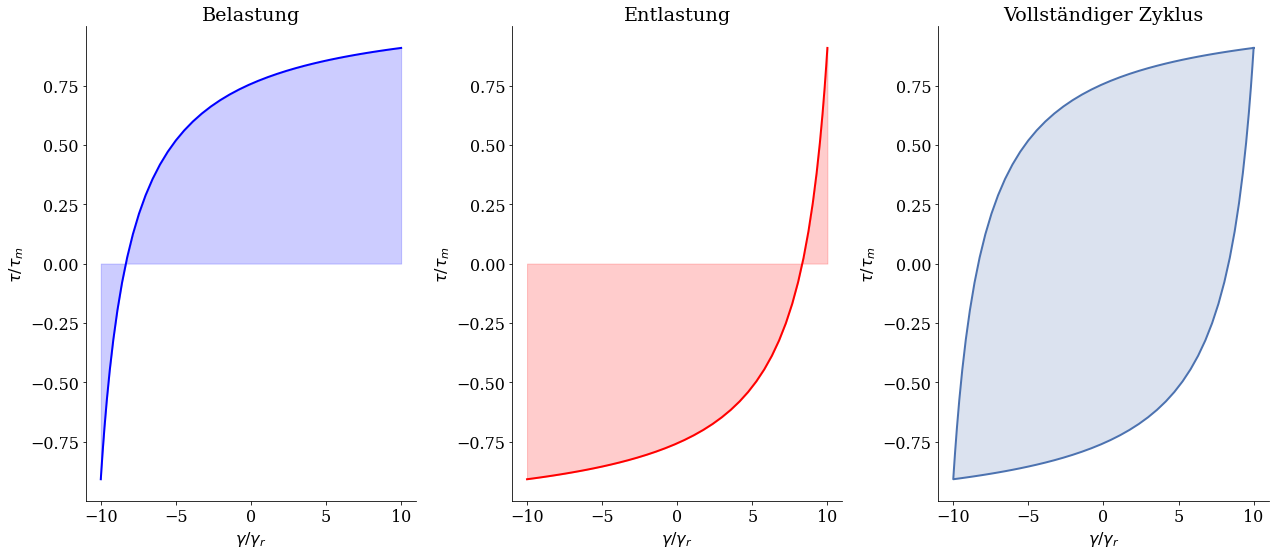

In [2]:
#HIDDEN
%run plot_functions/soil_model_interaction.ipynb
plot_integrals()

Symbolische Variablen einführen

In [3]:
zeta, eta, k, u_hat, omega, phi = sp.symbols('zeta eta k \hat{u} omega t')

Kraftverlauf und Verschiebungsdifferential

In [4]:
FD = 2*zeta*eta*k*u_hat*sp.sin(phi)
FD

2⋅\hat{u}⋅η⋅k⋅ζ⋅sin(t)

In [5]:
du = u_hat*sp.sin(phi)
du

\hat{u}⋅sin(t)

Dämpfungsarbeit über einen Zyklus (Integration $\varphi=0\dots2\pi$)

In [6]:
WD = sp.integrate(FD*du, (phi, 0, 2*sp.pi))
WD

           2      
2⋅π⋅\hat{u} ⋅η⋅k⋅ζ

Maximal in Feder gespeicherte Energie

In [7]:
WFmax = (1/2)*k*u_hat**2
WFmax

           2  
0.5⋅\hat{u} ⋅k

Dämpfungskapazität

In [8]:
Psi = sp.simplify(WD/WFmax)
Psi

4.0⋅π⋅η⋅ζ

Was ändert sich bei hysteretischer Dämpfung?

## Schubmodul und Dämpfung bei mittleren Dehnungen

Handbuchformeln \[Grundbau Taschenbuch\] für bindige Böden (rollige Böden bei $I_\text{P} = 0$):

$$
    \frac{G}{G_\text{max}} = \frac{1.03}{1+\frac{19}{1+(I_\text{P}/15})^{1.3} \gamma^{0.8}} \leq 1 \qquad \gamma \leq 1\,\%
$$

$$
    D = 2 + \frac{24.5 - (I_\text{P}/5)}{1+\frac{1}{7.4-(I_\text{P}/10}) \gamma^{0.8}} \leq 1 \qquad \gamma \leq 1\,\%,\ I_\text{P} \leq 50\,\%
$$

In [9]:
G_Gmax = lambda GA, IP: 1.03/(1+(19*GA**0.8)/(1.0+(IP/15.0)**1.3))
D = lambda GA, IP: 2 + (24.5-(IP/5.0))/(1.0+1.0/((7.4-(IP/10.0))*GA**0.8))

Beispielwerte

In [10]:
ga_hat = np.logspace(-4, 0) 
Ip_0 = 0    
Ip_1 = 10
Ip_2 = 20

G_Gmax0=G_Gmax(ga_hat, Ip_0)
D0 = D(ga_hat, Ip_0)

G_Gmax1=G_Gmax(ga_hat, Ip_1)
D1 = D(ga_hat, Ip_1)

G_Gmax2=G_Gmax(ga_hat, Ip_2)
D2 = D(ga_hat, Ip_2)

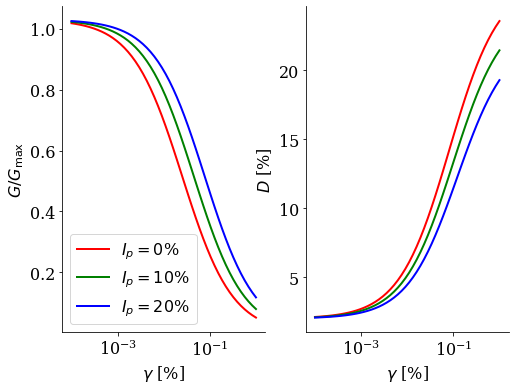

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2);
ax1.semilogx(ga_hat, G_Gmax0, 'r', ga_hat, G_Gmax1, 'g', ga_hat, G_Gmax2, 'b')
ax1.set_xlabel("$\gamma$ [%]")
ax1.set_ylabel("$G/G_\mathrm{max}$")
ax1.legend(["$I_p=0$%", "$I_p=10$%", "$I_p=20$%"])
ax2.semilogx(ga_hat, D0, 'r', ga_hat, D1, 'g', ga_hat, D2, 'b',)
ax2.set_xlabel("$\gamma$ [%]")
ax2.set_ylabel("$D$ [%]");    

Wie müssen die Verläufe für sehr kleine Dehnungen noch korrigiert werden?

## Schubmodul bei sehr kleinen Dehnungen

In [12]:
n = 0.5
S = 625.0
ee = 2.0
Ip = 0.6
Fe = 1/(0.3+0.7*ee**2)
sigma_eff0 = 1e6
p_atm = 1e5
GmaxNC = S*Fe*p_atm*(sigma_eff0/p_atm)**n
OCR = 5
k= Ip /(1+3*Ip**2)**(0.5)
GmaxOC = GmaxNC*OCR**k

print('GmaxNC = {:2.2f} MPa,   GmaxOC = {:2.2f} MPa'.format(GmaxNC*1e-6, GmaxOC*1e-6))

GmaxNC = 63.76 MPa,   GmaxOC = 124.54 MPa


## Masing-Hypothese

In [13]:
#HIDDEN
interactive_tau_gamma_plot()   # nondimensional parameters

interactive(children=(IntSlider(value=2, description='$\\gamma/\\gamma_r$:', max=15), Output()), _dom_classes=…

Wie könnte ein zyklischer dehnungsgesteuerter Belastungsvorgang mit veränderlicher Dehnungsamplitude aussehen?

## Zusatzaufgabe (für Programmierfans)

Simulieren Sie eine Be- und Entlastungsphase mit dem hypoplastischen Materialgesetz \[W. Fellin: Hypoplasticity for beginners\].

$$
    \dot{\sigma}=C_1\sigma\dot{\varepsilon}+C_2\sigma|\dot{\varepsilon}|
$$

Be- und entlasten Sie das Material also jeweils mit einer konstanten Dehnrate ausgehend von $\sigma_0 = 100$ kPa bis auf eine maximale Spannung von 1 MPa. Danach entlasten Sie das Material wieder auf die Ausgangsspannung. Was passiert für dieses einfache Modell, wenn Sie weitere gleichartige Zyklen anschließen? Ist das sinnvoll?

Verwenden Sie die Parameter $C_1 = 2 C_2 = 400$.

### Musterlösung

Die folgende Lösung reproduziert Fig. 4 aus \[Fellin2002\]. Achtung: hier sind mechanische Vorzeichen gewählt (Zug ist positiv).
Hier können fortschrittlichere numerische Algorithmen eingesetzt werden (siehe Vorlesung Numerische Methoden). Für das einfache Beispiel genügen allerdings einfache Verfahren.

In [55]:
initial_stress = -3.4e3
stress_hat = -300e3 - initial_stress
initial_strain = 0.0
#
C1 = -775
C2 = -433
#
n_steps = 1000
time = np.linspace(0,0.5,n_steps)
#
strain = np.zeros(n_steps)
stress = stress_hat * np.sin(2*np.pi*time) + initial_stress #Hier Sinus. Da ratenunabhängig, wäre auch bilineare Funktion oder Vergleichbares möglich.

In [52]:
strain[0] = initial_strain
for i,t in enumerate(time[0:-1]):
    dt = time[i+1] - time[i] #Zeitschritt
    dsigma = stress[i+1] - stress[i] #Spannungsinkrement im Zeitschritt
    mean_sigma = (stress[i+1] + stress[i])/2 #Mittlere Spannung im Zeitschritt
    CC = C1 + np.sign(dsigma)*C2 #Unterscheidung Be- und Entlastung
    de = dsigma/(mean_sigma*CC) #Dehungsinkrement; Zeitschrittunabhängig!! (ratenunabhängige Plastizität; hysteretische Dämpfung
    strain[i+1] = strain[i]+de

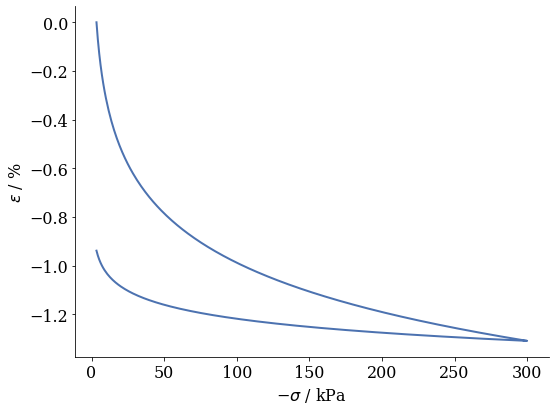

In [54]:
fig, ax = plt.subplots()
ax.plot(-stress/1e3,strain*100)
ax.set_xlabel('$-\sigma$ / kPa')
ax.set_ylabel('$\epsilon$ / %')
fig.tight_layout()